## Introduction to `matplotlib` interactivity

[Corey Schafer: Matplotlib Tutorial](https://www.youtube.com/playlist?list=PL-osiE80TeTvipOqomVEeZ1HRrcEvtZB_)

[Interactive plots](https://matplotlib.org/users/interactive.html)

[Jupyter Widgets](https://ipywidgets.readthedocs.io/en/latest/)

[UI with PyQt](https://realpython.com/python-menus-toolbars/#building-python-menu-bars-menus-and-toolbars-in-pyqt)

## 1. Interactive and non-interactive backends
_____________________
*  Interactive (user interface) backends for use in PyQt/PySide, PyGObject, Tkinter, wxPython, or macOS/Cocoa 
*  Non-interactive (hardcopy) backends to make image files (PNG, SVG, PDF, PS)


``ipympl`` provides 
* a **frontend** (in javascript) which handles: 
    * displaying the plots 
    * handling interaction events

* a **backend** (in python) that renders the plots and interfaces with user code. 

These two parts need to be able to communicate with each other for everything to work. 

``ipympl`` enables using the interactive features of matplotlib in Jupyter Notebooks, Jupyter Lab, Google Colab, VSCode notebooks.

#### 1.1. `%matplotlib` magic command parameters for backend setup:
_____________________
* `ipympl` --  for using  **`ipympl`** backend, which enables the interactive features of matplotlib in Jupyter Notebooks, Jupyter Lab, Google Colab, VSCode notebooks (explicit ``plt.show()``)
* `widget` --  for using  **`ipympl`** backend 
* `notebook` -- for using  **`nbagg`** backend to enable interactive figures in notebook 
* `inline` -- for displaying ``matplotlib`` figures inline

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### 1.2. Default interactive GUI-elements of the figure
____________________


* title bar across top
* navigation toolbar -- a series of buttons along the bottom left edge which provides the majority of backend interactivity
* a pair of `x` and `y` coordinates at the bottom right edge of the plot (as soon as the cursor enters the figure); this readout updates the actual values of a particular data point in the graph with every movement of the mouse  

**Example 1:**  a simple plot of some random, normally distributed data onto a 2-dimensional scatterplot

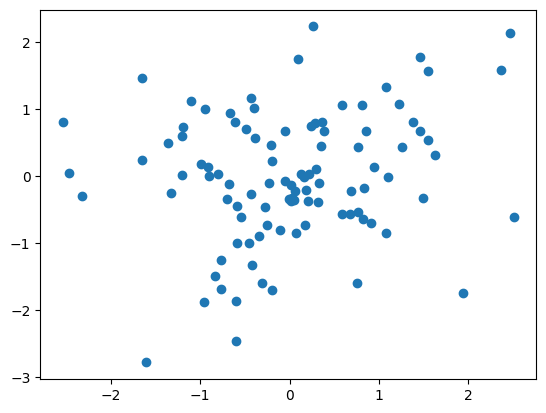

In [2]:
plt.scatter(np.random.randn(100), np.random.randn(100));

In [3]:
plt.close('all')

## 2. Event Handling
_____________

* hooking code into the **event loop** 
* call the `mpl_connect()` method from the current figure's canvas object and pass in the name of an event and a **callback function** 
* when the specified event occurs, this callback function will be called and it will be passed one of several objects specific to the type of event this callback function is handling.

#### ``mpl_connect(s, func)`` 

Connect event with string `s` to `func`

* ``def func(event)`` -- where ``event`` is an instance of the class derived from ``matplotlib.backend_bases.Event`` 
* return value of `mpl_connect()` is a connection `id` that can be used with `mpl_disconnect()`

## 3. Available events:
_________________

* `'button_press_event'`
* `'button_release_event'`
* `'draw_event'`
* `'key_press_event'`
* `'key_release_event'`
* `'motion_notify_event'`
* `'pick_event'`
* `'resize_event'`
* `'scroll_event'`
* `'figure_enter_event'`
* `'figure_leave_event'`
* `'axes_enter_event'`
* `'axes_leave_event'`
* `'close_event'`

## 4. Handling mouse buttons events
______________________

#### 4.1. Checking if the left mouse button was clicked
__________________
**Example 2:** using the x and y coordinates where the user clicked to plot a handful of normally distributed, random data points; 

In [4]:
def button_press_handler(event):
    if event.button == 1:
        sigma = 0.05
        n = 10
        xs = sigma * np.random.randn(n) + event.xdata
        ys = sigma * np.random.randn(n) + event.ydata
        plt.plot(xs, ys, 'bo')

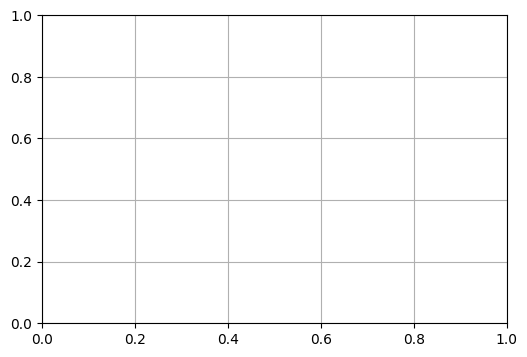

In [5]:
fig = plt.figure(figsize=(6, 4))# create a new Figure object
ax = fig.gca()            # grab figure's axes object
#ax.grid('off')
ax.grid('on')
ax.set_autoscale_on(False)# True -- rescaling to fit all of data points as tightly as possible

In [6]:
# Connect the event listeners  
fig.canvas.mpl_connect('button_press_event', button_press_handler);

Major problem with the figure above: click on the one of built-in interactivity buttons doesn't stop plotting new points. 

#### 4.2. Ignoring mouse events outside of normal mode (== no mode)
______________________

1. grab a reference to the toolbar
2. check the current mode 


In [7]:
def button_press_handler(event):
    # Get the toolbar and make sure that we are not in zoom or pan mode. 
    # If we are, just exit without doing anything
    toolbar = plt.get_current_fig_manager().toolbar
    if toolbar.mode != "":
        pass
    elif event.button == 1:
        sigma = 0.05
        n = 10
        xs = sigma * np.random.randn(n) + event.xdata
        ys = sigma * np.random.randn(n) + event.ydata
        plt.plot(xs, ys, 'bo')

## 5. Handling key press events
__________________

#### 5.1.Handler function for key press events:
_____________________
checking if the user has pressed the 'r' key (for regression), and if so:
* gather all of the data points from the axes object
* perform a linear regression on the data points
* plot the resultant line

In [8]:
def key_press_handler(event):
    if event.key.lower() == 'r':
        ax = plt.gca()
        xs = [x for l in ax.lines for x in l.get_xdata()]
        ys = [y for l in ax.lines for y in l.get_ydata()]
        m, b = np.polyfit(xs, ys, 1)
        xs = np.linspace(*plt.xlim(), num=2)
        plt.plot(xs, m*xs+b, 'r--')

#### 5.2. Connecting both event handlers to their respective events:
________________________

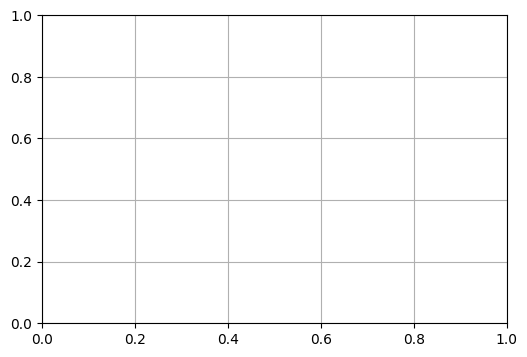

In [9]:
fig = plt.figure(figsize=(6, 4))

ax = fig.gca()
ax.grid('off')
ax.set_autoscale_on(False)

# Connect the event listeners 
fig.canvas.mpl_connect('button_press_event', button_press_handler)
fig.canvas.mpl_connect('key_press_event', key_press_handler)

plt.show()

#### Closing all of the figures

In [10]:
plt.close('all')